# Exercise sheet 11

# Exercise 1 - Multilevel tadpoles

Revisit the Reedfrog survival data from the course (reedfrogs) and add the predation and size treatment variables to the multi-level model. Consider models with either predictor alone, both predictors, as well as a model including their interaction. What do you infer about the causal influence of these predictor variables? Also focus on the inferred variation across tanks (the σ across tanks). Explain why it changes as it does across models with different predictors included.

In [62]:
library(rethinking)
data(reedfrogs)
d <- reedfrogs
d$pred <- as.integer(d$pred) - 1
d$big <- 3 - as.integer(d$size) - 1
d$tank <- 1:nrow(d)
d

density,pred,size,surv,propsurv,big,tank
<int>,<dbl>,<fct>,<int>,<dbl>,<dbl>,<int>
10,0,big,9,0.9000000,1,1
10,0,big,10,1.0000000,1,2
10,0,big,7,0.7000000,1,3
10,0,big,10,1.0000000,1,4
10,0,small,9,0.9000000,0,5
10,0,small,9,0.9000000,0,6
10,0,small,10,1.0000000,0,7
10,0,small,9,0.9000000,0,8
10,1,big,4,0.4000000,1,9


In [63]:
model1 <- map2stan(
	alist(
		surv ~ dbinom(density, p),
		logit(p) <- off[tank],
		off[tank] ~ dnorm(a, sigma),
		a ~ dnorm(0, 1),
		sigma ~ dcauchy(0, 1)		
	),
	data = d, iter = 4000, chains = 16, cores = 16
)

Warning message in map2stan(alist(surv ~ dbinom(density, p), logit(p) <- off[tank], :
"DEPRECATED: map2stan is no longer supported and may behave unpredictably or stop working altogether. Start using ulam instead."
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-694858e93346.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-694858e93346.stan', line 6, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-694858e93346.stan

Running MCMC with 16 parallel chains...

Chain 1 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 1 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 1 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 1 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 1 Iteration:  500 / 4000 [ 12%]  (Warmup) 
Chain 2 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 2 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 2 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 2 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 2 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 2 Iteration:  500 / 4000 [ 12%]  (Warmup) 
Chain 3 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 3 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 3 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 3 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 3 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 3 Iteration:  500 / 4000 [ 12%]  (Warmup) 
Chain 4 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 4 Iteration:  100 / 40

Computing WAIC



In [64]:
model_pred <- map2stan(
	alist(
		surv ~ dbinom(density, p),
		logit(p) <- off[tank] + offset_pred[tank] * pred,
		off[tank] ~ dnorm(a, sigma),
		a ~ dnorm(0, 1),
		sigma ~ dcauchy(0, 1),
		offset_pred[tank] ~ dnorm(a_pred, sigma_pred),
		a_pred ~ dnorm(0, 1),
		sigma_pred ~ dcauchy(0, 1)
	),
	data = d, iter = 4000, chains = 16, cores = 16
)

Warning message in map2stan(alist(surv ~ dbinom(density, p), logit(p) <- off[tank] + :
"DEPRECATED: map2stan is no longer supported and may behave unpredictably or stop working altogether. Start using ulam instead."
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-69481b981ce2.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-69481b981ce2.stan', line 6, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-69481b981ce2.sta

Running MCMC with 16 parallel chains...

Chain 1 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 2 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 3 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 4 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 5 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 5 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 5 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-69481b981ce2.stan', line 25, column 4 to column 30)

Chain 5 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 5 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 5 



Chain 6 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 6 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 6 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-69481b981ce2.stan', line 22, column 4 to column 48)

Chain 6 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 6 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 6 



Chain 7 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 8 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 9 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 10 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 11 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 12 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 12 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 12 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-69481b981ce2.stan', line 22, column 4 to column 48)

Chain 12 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 12 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 12 



Chain 13 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 14 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 14 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 14 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-69481b981ce2.stan', line 22, column 4 to column 48)

Chain 14 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 14 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 14 



Chain 15 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 15 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 15 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-69481b981ce2.stan', line 22, column 4 to column 48)

Chain 15 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 15 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 15 



Chain 16 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 1 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 1 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 1 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 2 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 2 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 2 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 2 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 2 Iteration:  500 / 4000 [ 12%]  (Warmup) 
Chain 2 Iteration:  600 / 4000 [ 15%]  (Warmup) 
Chain 2 Iteration:  700 / 4000 [ 17%]  (Warmup) 
Chain 2 Iteration:  800 / 4000 [ 20%]  (Warmup) 
Chain 2 Iteration:  900 / 4000 [ 22%]  (Warmup) 
Chain 2 Iteration: 1000 / 4000 [ 25%]  (Warmup) 
Chain 2 Iteration: 1100 / 4000 [ 27%]  (Warmup) 
Chain 2 Iteration: 1200 / 4000 [ 30%]  (Warmup) 
Chain 2 Iteration: 1300 / 4000 [ 32%]  (Warmup) 
Chain 2 Iteration: 1400 / 4000 [ 35%]  (Warmup) 
Chain 3 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 3 Iteration: 

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


Computing WAIC

Warning message in map2stan(alist(surv ~ dbinom(density, p), logit(p) <- off[tank] + :
"There were 799 divergent iterations during sampling.
Check the chains (trace plots, n_eff, Rhat) carefully to ensure they are valid."


In [65]:
model_big <- map2stan(
	alist(
		surv ~ dbinom(density, p),
		logit(p) <- off[tank] + offset_big[tank] * big,
		off[tank] ~ dnorm(a, sigma),
		a ~ dnorm(0, 1),
		sigma ~ dcauchy(0, 1),
		offset_big[tank] ~ dnorm(a_big, sigma_big),
		a_big ~ dnorm(0, 1),
		sigma_big ~ dcauchy(0, 1)
	),
	data = d, iter = 4000, chains = 16, cores = 16
)

Warning message in map2stan(alist(surv ~ dbinom(density, p), logit(p) <- off[tank] + :
"DEPRECATED: map2stan is no longer supported and may behave unpredictably or stop working altogether. Start using ulam instead."
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-6948563366cd.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-6948563366cd.stan', line 6, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-6948563366cd.sta

Running MCMC with 16 parallel chains...

Chain 1 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 2 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 2 Iteration:  100 / 4000 [  2%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-6948563366cd.stan', line 25, column 4 to column 30)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 3 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 4 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 4 Iteration:  100 / 4000 [  2%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-6948563366cd.stan', line 22, column 4 to column 45)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 



Chain 5 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 5 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 6 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 6 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 6 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-6948563366cd.stan', line 25, column 4 to column 30)

Chain 6 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 6 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 6 



Chain 7 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 7 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 8 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 8 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 9 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 9 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 10 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 10 Iteration:  100 / 4000 [  2%]  (Warmup) 


Chain 10 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 10 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-6948563366cd.stan', line 22, column 4 to column 45)

Chain 10 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 10 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 10 



Chain 11 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 12 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 13 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 13 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 13 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-6948563366cd.stan', line 25, column 4 to column 30)

Chain 13 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 13 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 13 



Chain 14 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 15 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 16 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 16 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 16 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-6948563366cd.stan', line 25, column 4 to column 30)

Chain 16 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 16 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 16 



Chain 1 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 1 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 1 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 1 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 1 Iteration:  500 / 4000 [ 12%]  (Warmup) 
Chain 1 Iteration:  600 / 4000 [ 15%]  (Warmup) 
Chain 1 Iteration:  700 / 4000 [ 17%]  (Warmup) 
Chain 1 Iteration:  800 / 4000 [ 20%]  (Warmup) 
Chain 2 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 2 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 2 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 2 Iteration:  500 / 4000 [ 12%]  (Warmup) 
Chain 2 Iteration:  600 / 4000 [ 15%]  (Warmup) 
Chain 2 Iteration:  700 / 4000 [ 17%]  (Warmup) 
Chain 2 Iteration:  800 / 4000 [ 20%]  (Warmup) 
Chain 2 Iteration:  900 / 4000 [ 22%]  (Warmup) 
Chain 2 Iteration: 1000 / 4000 [ 25%]  (Warmup) 
Chain 2 Iteration: 1100 / 4000 [ 27%]  (Warmup) 
Chain 2 Iteration: 1200 / 4000 [ 30%]  (Warmup) 
Chain 2 Iteration: 1300 / 4000 [ 32%]  (Warmup) 
Chain 2 Iteration: 1

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


Computing WAIC

Warning message in map2stan(alist(surv ~ dbinom(density, p), logit(p) <- off[tank] + :
"There were 221 divergent iterations during sampling.
Check the chains (trace plots, n_eff, Rhat) carefully to ensure they are valid."


In [66]:
model_both <- map2stan(
	alist(
		surv ~ dbinom(density, p),
		logit(p) <- off[tank] + offset_pred[tank] * pred + offset_big[tank] * big,
		off[tank] ~ dnorm(a, sigma),
		a ~ dnorm(0, 1),
		sigma ~ dcauchy(0, 1),
		offset_pred[tank] ~ dnorm(a_pred, sigma_pred),
		a_pred ~ dnorm(0, 1),
		sigma_pred ~ dcauchy(0, 1),
		offset_big[tank] ~ dnorm(a_big, sigma_big),
		a_big ~ dnorm(0, 1),
		sigma_big ~ dcauchy(0, 1)
	),
	data = d, iter = 4000, chains = 16, cores = 16
)

Warning message in map2stan(alist(surv ~ dbinom(density, p), logit(p) <- off[tank] + :
"DEPRECATED: map2stan is no longer supported and may behave unpredictably or stop working altogether. Start using ulam instead."
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-694892e40d5.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-694892e40d5.stan', line 6, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-694892e40d5.stan',

Running MCMC with 16 parallel chains...

Chain 1 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 4000 [  2%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-694892e40d5.stan', line 32, column 4 to column 30)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 2 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 3 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 4 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-694892e40d5.stan', line 32, column 4 to column 30)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 



Chain 5 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 6 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 6 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 6 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-694892e40d5.stan', line 26, column 4 to column 45)

Chain 6 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 6 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 6 



Chain 7 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 8 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 8 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 8 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-694892e40d5.stan', line 26, column 4 to column 45)

Chain 8 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 8 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 8 



Chain 9 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 10 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 11 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 11 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 11 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-694892e40d5.stan', line 26, column 4 to column 45)

Chain 11 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 11 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 11 



Chain 12 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 13 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 14 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 14 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 14 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-694892e40d5.stan', line 26, column 4 to column 45)

Chain 14 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 14 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 14 



Chain 15 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 15 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 15 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-694892e40d5.stan', line 26, column 4 to column 45)

Chain 15 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 15 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 15 



Chain 16 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 16 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 16 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-694892e40d5.stan', line 26, column 4 to column 45)

Chain 16 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 16 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 16 



Chain 1 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 1 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 1 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 1 Iteration:  500 / 4000 [ 12%]  (Warmup) 
Chain 2 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 2 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 2 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 2 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 3 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 3 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 3 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 3 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 3 Iteration:  500 / 4000 [ 12%]  (Warmup) 
Chain 3 Iteration:  600 / 4000 [ 15%]  (Warmup) 
Chain 4 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 4 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 4 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 4 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 5 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 5 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 5 Iteration:  

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


Computing WAIC

Warning message in map2stan(alist(surv ~ dbinom(density, p), logit(p) <- off[tank] + :
"There were 2368 divergent iterations during sampling.
Check the chains (trace plots, n_eff, Rhat) carefully to ensure they are valid."


In [67]:
model_inter <- map2stan(
	alist(
		surv ~ dbinom(density, p),
		logit(p) <- off[tank] + offset_pred[tank] * pred + offset_big[tank] * big + offset_inter[tank] * big * pred,
		off[tank] ~ dnorm(a, sigma),
		a ~ dnorm(0, 1),
		sigma ~ dcauchy(0, 1),
		offset_pred[tank] ~ dnorm(a_pred, sigma_pred),
		a_pred ~ dnorm(0, 1),
		sigma_pred ~ dcauchy(0, 1),
		offset_big[tank] ~ dnorm(a_big, sigma_big),
		a_big ~ dnorm(0, 1),
		sigma_big ~ dcauchy(0, 1),
		offset_inter[tank] ~ dnorm(a_inter, sigma_inter),
		a_inter ~ dnorm(0, 1),
		sigma_inter ~ dcauchy(0, 1)
	),
	data = d, iter = 4000, chains = 16, cores = 16
)

Warning message in map2stan(alist(surv ~ dbinom(density, p), logit(p) <- off[tank] + :
"DEPRECATED: map2stan is no longer supported and may behave unpredictably or stop working altogether. Start using ulam instead."
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-6948139f73d4.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-6948139f73d4.stan', line 6, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-6948139f73d4.sta

Running MCMC with 16 parallel chains...

Chain 1 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-6948139f73d4.stan', line 29, column 4 to column 51)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 2 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-6948139f73d4.stan', line 29, column 4 to column 51)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 3 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-6948139f73d4.stan', line 35, column 4 to column 48)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 4 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 5 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 5 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 5 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-6948139f73d4.stan', line 29, column 4 to column 51)

Chain 5 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 5 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 5 



Chain 6 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 6 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 6 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-6948139f73d4.stan', line 38, column 4 to column 30)

Chain 6 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 6 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 6 



Chain 7 Iteration:    1 / 4000 [  0%]  (Warmup) 
Chain 8 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 8 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 8 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-6948139f73d4.stan', line 32, column 4 to column 45)

Chain 8 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 8 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 8 



Chain 9 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 9 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 9 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-6948139f73d4.stan', line 29, column 4 to column 51)

Chain 9 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 9 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 9 



Chain 10 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 10 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 10 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-6948139f73d4.stan', line 29, column 4 to column 51)

Chain 10 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 10 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 10 



Chain 11 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 11 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 11 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-6948139f73d4.stan', line 29, column 4 to column 51)

Chain 11 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 11 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 11 



Chain 12 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 12 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 12 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-6948139f73d4.stan', line 32, column 4 to column 45)

Chain 12 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 12 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 12 



Chain 13 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 13 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 13 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-6948139f73d4.stan', line 38, column 4 to column 30)

Chain 13 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 13 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 13 



Chain 14 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 14 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 14 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-6948139f73d4.stan', line 29, column 4 to column 51)

Chain 14 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 14 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 14 



Chain 15 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 15 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 15 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-6948139f73d4.stan', line 38, column 4 to column 30)

Chain 15 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 15 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 15 



Chain 16 Iteration:    1 / 4000 [  0%]  (Warmup) 


Chain 16 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 16 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpMBY2sz/model-6948139f73d4.stan', line 29, column 4 to column 51)

Chain 16 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 16 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 16 



Chain 1 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 1 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 1 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 2 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 2 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 3 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 3 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 3 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 3 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 4 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 4 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 4 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 4 Iteration:  400 / 4000 [ 10%]  (Warmup) 
Chain 4 Iteration:  500 / 4000 [ 12%]  (Warmup) 
Chain 5 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 5 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 5 Iteration:  300 / 4000 [  7%]  (Warmup) 
Chain 6 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 7 Iteration:  100 / 4000 [  2%]  (Warmup) 
Chain 7 Iteration:  200 / 4000 [  5%]  (Warmup) 
Chain 7 Iteration:  

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


Computing WAIC

Warning message in map2stan(alist(surv ~ dbinom(density, p), logit(p) <- off[tank] + :
"There were 2258 divergent iterations during sampling.
Check the chains (trace plots, n_eff, Rhat) carefully to ensure they are valid."


In [68]:
compare(model1, model_pred, model_big, model_both, model_inter)

,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
model_pred,995.7973,36.77563,0.0000000,NA,23.40254,0.4779577329
model_inter,996.6744,37.36531,0.8770859,2.564538,25.18453,0.3082710235
model_both,997.4129,36.93040,1.6155861,1.574326,25.58910,0.2130931196
model_big,1010.1751,38.05108,14.3778599,6.857229,37.98101,0.0003608086
model1,1010.4320,37.98034,14.6347628,6.590840,38.12256,0.0003173154


Interestingly, the model only with predators measures the best with the WAIC. We can say that the most important predictor is the precence of predators.

[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]


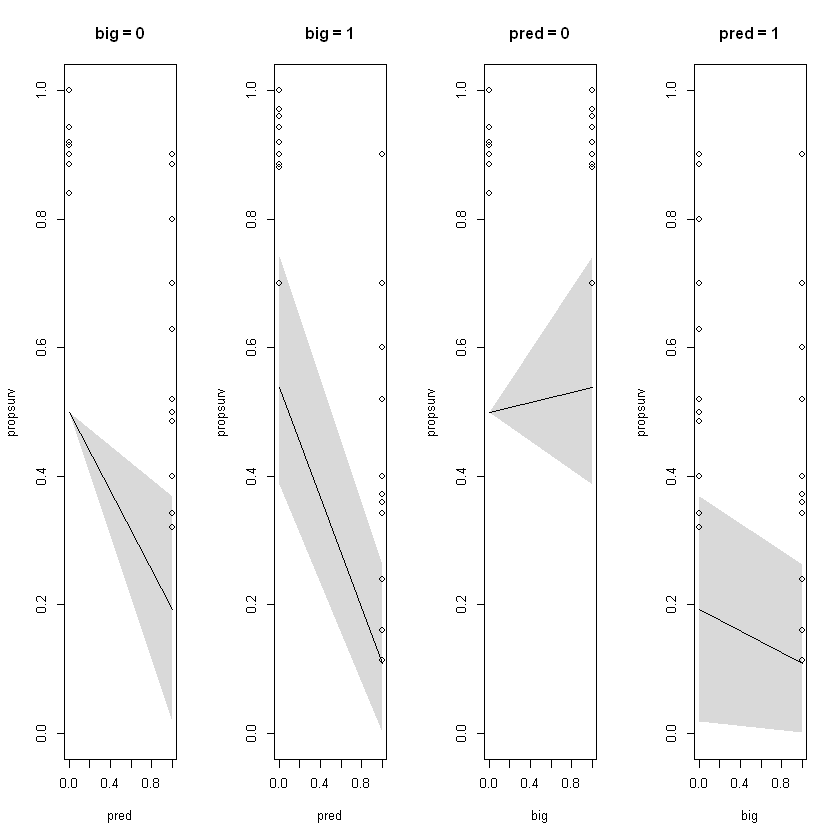

In [74]:
# Sampling the posterior for each of the four cases
post_inter <- extract.samples(model_inter)
link_inter <- function(pred, big) post_inter$off + post_inter$offset_pred * pred + post_inter$offset_big * big + post_inter$offset_inter * big * pred

# Making four contrafactual plots
par(mfrow = c(1,4))
my_seq = c(0,1)
for (big in my_seq) {
	dt <- d[d$big == big, ] 
	plot(propsurv ~ pred, data=dt, xlim=c(0, 1), ylim=c(0, 1), 
	xlab="pred")
	title(paste("big =", big))
	mu <- link(model_inter , data=list(pred = my_seq, big = big, tank = 0)) 
	mu.mean <- apply(mu, 2, mean) 
	mu.HPDI <- apply(mu, 2, HPDI, prob=0.91) 
	lines(0:1, mu.mean ) 
	shade(mu.HPDI, my_seq)
}
for (pred in my_seq) {
	dt <- d[d$pred == pred, ] 
	plot(propsurv ~ big, data=dt, xlim=c(0, 1), ylim=c(0, 1), 
	xlab="big")
	title(paste("pred =", pred))
	mu <- link(model_inter , data=list(big = my_seq, pred = pred, tank = 0)) 
	mu.mean <- apply(mu, 2, mean) 
	mu.HPDI <- apply(mu, 2, HPDI, prob=0.91) 
	lines(0:1, mu.mean ) 
	shade(mu.HPDI, my_seq)
}

So the plots tell us the following:
1. Including predators in a small tank reduces the probability of survival dramatically.
2. In a big tank it reduces the probability even more.
3. Without predators, the chance of survival is around the same for both sizes of tank.
4. With predators, we can see that the change from a small to a big tank reduces the chance of survival.

[1] 1.1702426 1.2454358 1.0809658 2.4502126 2.5774935 3.1157317 1.1016926
 [8] 2.7658507 2.3052755 0.9287831 2.0889955 1.1750024

[1] 2.073773 2.506370 2.279854 4.041568 4.742284 7.731427 2.404112 5.379250
 [9] 6.706409 1.700143 4.525572 2.453212

[1] "sigma"       "sigma"       "sigma_big"   "sigma"       "sigma_pred" 
 [6] "sigma"       "sigma_big"   "sigma_pred"  "sigma"       "sigma_big"  
[11] "sigma_pred"  "sigma_inter"

[1] "grey"       "aquamarine" "aquamarine" "pink"       "pink"      
 [6] "violet"     "violet"     "violet"     "purple"     "purple"    
[11] "purple"     "purple"

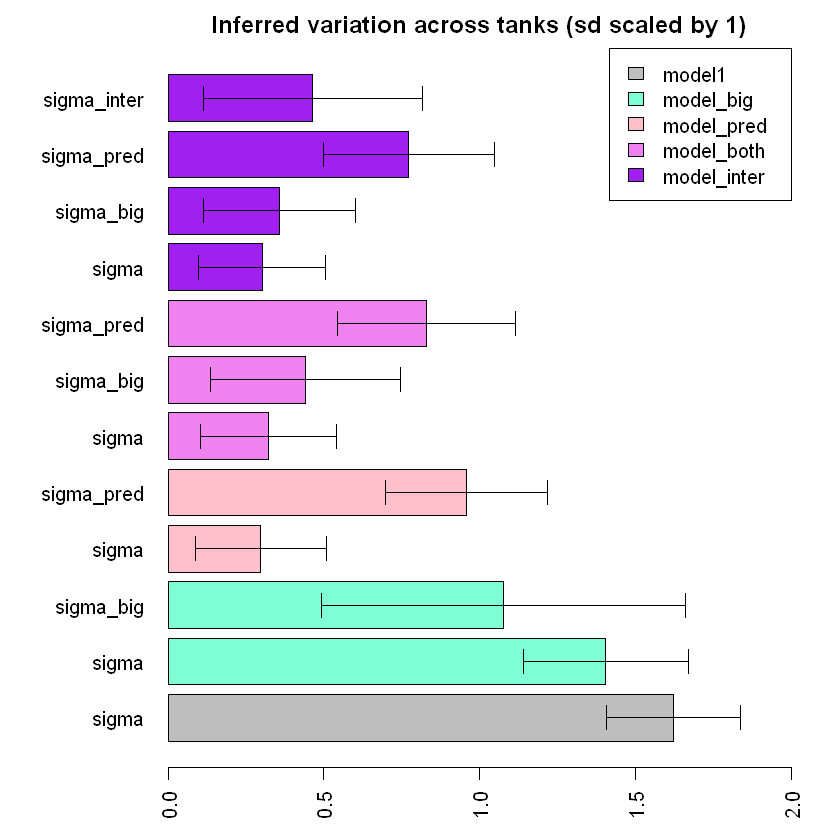

In [77]:
post1 <- extract.samples(model1)
post_big <- extract.samples(model_big)
post_pred <- extract.samples(model_pred)
post_both <- extract.samples(model_both)
post_inter <- extract.samples(model_inter)

posteriors <- list(
	list(post = post1, name = "model1", col = "grey"),
	list(post = post_big, name = "model_big", col = "aquamarine"),
	list(post = post_pred, name = "model_pred", col = "pink"),
	list(post = post_both, name = "model_both", col = "violet"),
	list(post = post_inter, name = "model_inter", col = "purple")
)
sigma_means <- c()
sigma_sds <- c()
sigma_names <- c()
sigma_cols <- c()
model_names <- c()
model_cols <- c()

for (pac in posteriors) {
	post <- pac$post
	col <- pac$col
	model_names <- append(model_names, pac$name)
	model_cols <- append(model_cols, col)
	if (any(names(post) == "sigma")) {
		sigma_means <- append(sigma_means, mean(post$sigma))
		sigma_sds <- append(sigma_sds, sd(post$sigma))
		sigma_names <- append(sigma_names, "sigma")
		sigma_cols <- append(sigma_cols, col)
	}
	if (any(names(post) == "sigma_big")) {
		sigma_means <- append(sigma_means, mean(post$sigma_big))
		sigma_sds <- append(sigma_sds, sd(post$sigma_big))
		sigma_names <- append(sigma_names, "sigma_big")
		sigma_cols <- append(sigma_cols, col)
	}
	if (any(names(post) == "sigma_pred")) {
		sigma_means <- append(sigma_means, mean(post$sigma_pred))
		sigma_sds <- append(sigma_sds, sd(post$sigma_pred))
		sigma_names <- append(sigma_names, "sigma_pred")
		sigma_cols <- append(sigma_cols, col)
	}
	if (any(names(post) == "sigma_inter")) {
		sigma_means <- append(sigma_means, mean(post$sigma_inter))
		sigma_sds <- append(sigma_sds, sd(post$sigma_inter))
		sigma_names <- append(sigma_names, "sigma_inter")
		sigma_cols <- append(sigma_cols, col)
	}
}

sigma_mean
sigma_sd
sigma_names
sigma_cols

scale <- 1.2
offset <- 0.5
sd_scale <- 1

par(mar = c(3, 7, 2, 2))
bp <- barplot(sigma_means, names.arg = sigma_names, las=2, xpd = FALSE, horiz = TRUE, col = sigma_cols, xlim = c(0, 2))
arrows(sigma_means + sigma_sds * sd_scale, (1:length(sigma_means)) * scale - offset, sigma_means - sigma_sds * sd_scale, (1:length(sigma_means)) * scale - offset, angle = 90, code = 3, length = 0.1, col = "black")
title(paste("Inferred variation across tanks ", "(sd scaled by ", sd_scale, ")", sep = ""))
legend("topright", model_names, fill = model_cols)